In [2]:
# Import statements here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA 

In [3]:
# Read in data into new dataframe
df = pd.read_excel("/Users/hariaksha/Documents/GitHub/gdpr/data/welle120_aufbereitet.xlsx")

In [4]:
print(f"Total number of rows in dataframe: {len(df)}")

# Filter out rows with empty values in specific columns
columns = ['erf_speich', 'si_speich', 'erf_intern', 'si_intern', 'erf_extunt', 'si_extunt', 'erf_forsch', 
                  'si_forsch', 'a_rsicher', 'pdwichtig', 'a_nachteil', 'a_gefahr', 'a_kompliz', 'a_vorteil', 
                  'a_vertrau', 'a_inno', 'a_kost', 'a_berat', 'a_proz', 'a_stand', 'a_ki', 'a_forsch', 
                  'aufwand', 'datengm', 'umheute', 'nach', 'ums', 'pers', 'nache', 'umse', 'perse']
df_clean = df.dropna(subset=columns)
# df_clean = df_clean.drop(["beh_grund", "online", "vg", 'br08', 'bges', 'gk9', 'gk4', 'aweight', 'br04', 'br07'], axis=1)

print(df_clean.head())
print(df_clean.tail())
print(f"Total number of rows in cleaned dataframe: {len(df_clean)}")

Total number of rows in dataframe: 1352
       ums    nach    pers    umse   nache   perse  pdwichtig  umheute  \
5   runter  runter  gleich  runter  runter  runter        3.0      4.0   
6     hoch    hoch    hoch  gleich  gleich    hoch        5.0      5.0   
7   gleich  gleich  gleich  gleich  gleich  gleich        5.0      4.0   
11  gleich    hoch  gleich    hoch    hoch  gleich        2.0      5.0   
13  runter  runter  runter  runter  runter  gleich        5.0      4.0   

    aspekte  aufwand  ...  br_zahl               br08   bges      gk9    gk4  \
5       2.0      2.0  ...      5.0          UBeratung  395.0  250-499  >=100   
6       2.0      3.0  ...      1.0  IKT-Dienstleister   46.0    20-49  20-99   
7       2.0      3.0  ...      2.0          ReSteuWip   23.0    20-49  20-99   
11      2.0      3.0  ...      1.0  IKT-Dienstleister   31.0    20-49  20-99   
13      3.0      3.0  ...      1.0             techDL   50.0    50-99  20-99   

       aweight  online      vg    

**Descriptive Statistics**\
In the following code block, we find the following descriptive statistics to describe the sample:
* standard deviation
* sample size
* minimum
* maximum
* median

We also find the following inferential statistics to make inferences about the general population:
* confidence interval upper and lower bounds
    * Note that a 95% confidence interval indicates that there is a 95% chance that the true population mean is in that interval. This does not mean that 95% of the population is in this interval.

In [ ]:
column_of_interest = 'a_inno'
# Display basic statistics for the column of interest
print(f"Descriptive statistics for {column_of_interest}:")
print(df_clean[column_of_interest].describe())
print("Skew:\t", df_clean[column_of_interest].skew())

# Display confidence interval for the column of interest
print(stats.norm.interval(confidence = 0.95, loc = df_clean[column_of_interest].mean(), scale = (df_clean[column_of_interest].std()/np.sqrt(df_clean[column_of_interest].count()))))

**Hypothesis Testing**

In [ ]:
column_of_interest = 'a_inno'
column_of_interest2 = 'a_kost'

# Perform one-sample z-test
mean_null_hypothesis = 3  # Hypothesized population mean
result = ztest(df_clean[column_of_interest], value=mean_null_hypothesis)
print(f"The test statistic (z-score) and p-value for the one-sample z-test on {column_of_interest} with null hypothesis mean {mean_null_hypothesis} are: {result[0]} and {result[1]}")

print(f"Means of {column_of_interest} and {column_of_interest2}: {df_clean[column_of_interest].mean()} and {df_clean[column_of_interest2].mean()}")

# Perform two-sample z-test
mean_null_hypothesis = 3  # Hypothesized population mean
result = ztest(df_clean[column_of_interest], df_clean[column_of_interest2], value=mean_null_hypothesis)
print(f"The test statistic (z-score) and p-value for the two-sample z-test on {column_of_interest} and {column_of_interest2} are: {result[0]} and {result[1]}")


**Create Uniform or Normal Random Simulation Sampling Distributions**

In [ ]:
column_of_interest = 'a_inno'
sample = np.random.uniform(low=1.0, high=5.0, size=1000)
sample = np.random.normal(loc=df_clean[column_of_interest].mean(), scale=df_clean[column_of_interest].std(), size=1000)

In [23]:
# Get counts in table and percentage format
column_of_interest = 'gk4'
print(df_clean[column_of_interest].value_counts())
print(df_clean[column_of_interest].value_counts(normalize=True) * 100)

# Get average response for column
average_response = df_clean[column_of_interest].mean()
print(f"Average response for {column_of_interest}: {average_response}")

# Create a bar plot for the one column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x=column_of_interest, order=df_clean[column_of_interest].value_counts().index)
plt.title('Distribution of ' + column_of_interest)
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.show()

gk4
20-99    226
5-19     208
>=100    203
Name: count, dtype: int64
gk4
20-99    35.478807
5-19     32.653061
>=100    31.868132
Name: proportion, dtype: float64


TypeError: Cannot perform reduction 'mean' with string dtype

**Recoding Variables**

We need to recode most variables to binary variables (0/1).
* The variables ums, umse, nach, nache, pers, and perse each have responses of increasing (), same (gleich), or decreasing (gefallen); they will be used to create new variables such as umsgleich and nachegesunken, which are respectively 1 if the ums response is 'gleich' or if the nache response is 'gesunken'.
* The other variables, for example kund_dat, all either have responses from one to four or one to five; they wll be used to create new variables such as kund_dat2, kund_dat3, kund_dat4 and kund_dat5, kund_dat23, and kund_dat45.
* Note that the responses of 'increasing' and '1' for all variables have not been encoded. This is because these variables wll be included or carried in the intercept in any regression, and they therefore do not need to be explicitly encoded.

This recoding will allow us to do multivariable binary logistic regression.

In [5]:
# turn the erf variables to 0s and 1s instead of 1s and 2s
# recode to 0/1: 1 = consent required, 0 = not required
for col in ['erf_extunt', 'erf_intern', 'erf_forsch', 'erf_speich']:
    df_clean[col] = df_clean[col] == 1

# recode variables / create binary data variables for high certainty for 4 situational questions (si_speich, si_intern, si_extunt, si_forsch)
new_cols = pd.DataFrame({
    'si_speich_high': (df_clean['si_speich'] > 3),
    'si_intern_high': (df_clean['si_intern'] > 3),
    'si_extunt_high': (df_clean['si_extunt'] > 3),
    'si_forsch_high': (df_clean['si_forsch'] > 3)
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

new_cols = pd.DataFrame({
    'sicher_speich_certainty_and_yes': (df_clean['si_speich_high'] == 1) & (df_clean['erf_speich'] == 1),
    'sicher_intern_certainty_and_yes': (df_clean['si_intern_high'] == 1) & (df_clean['erf_intern'] == 1),
    'sicher_extunt_certainty_and_yes': (df_clean['si_extunt_high'] == 1) & (df_clean['erf_extunt'] == 1),
    'sicher_forsch_certainty_and_yes': (df_clean['si_forsch_high'] == 1) & (df_clean['erf_forsch'] == 1)
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# recode the agreement questions
new_cols = pd.DataFrame({
    'a_positiv_zustimmung': (df_clean['a_positiv'] > 3),
    'a_rsicher_zustimmung': (df_clean['a_rsicher'] > 3),
    'a_gefahr_zustimmung': (df_clean['a_gefahr'] > 3),
    'a_aufwand_zustimmung': (df_clean['a_aufwand'] > 3),
    'a_kompliz_zustimmung': (df_clean['a_kompliz'] > 3),
    'a_vorteil_zustimmung': (df_clean['a_vorteil'] > 3),
    'a_vertrau_zustimmung': (df_clean['a_vertrau'] > 3),
    'a_inno_zustimmung': (df_clean['a_inno'] > 3),
    'a_kost_zustimmung': (df_clean['a_kost'] > 3),
    'a_berat_zustimmung': (df_clean['a_berat'] > 3),
    'a_proz_zustimmung': (df_clean['a_proz'] > 3),
    'a_stand_zustimmung': (df_clean['a_stand'] > 3),
    'a_ki_zustimmung': (df_clean['a_ki'] > 3),
    'a_forsch_zustimmung': (df_clean['a_forsch'] > 3),
    'a_nachteil_zustimmung': (df_clean['a_nachteil'] > 3)
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# create binary variable to see if firm has high certainty in all scenarios
df_clean['always_high_certainty'] = (df_clean['si_speich'] > 3) & (df_clean['si_intern'] > 3) & (df_clean['si_extunt'] > 3) & (df_clean['si_forsch'] > 3)

# create binary variable for if firm has high certainty (4 or 5) on average
df_clean['avg_high_certainty'] = df_clean['si_speich'] + df_clean['si_intern'] + df_clean['si_extunt'] + df_clean['si_forsch'] >= 16

# use dummy coding to create new binary variables for pdwichtig
new_cols = pd.DataFrame({
    'pdwichtig2': (df_clean['pdwichtig'] == 2),
    'pdwichtig3': (df_clean['pdwichtig'] == 3),
    'pdwichtig4': (df_clean['pdwichtig'] == 4),
    'pdwichtig5': (df_clean['pdwichtig'] == 5),
    'pdwichtig23': (df_clean['pdwichtig'].isin([2, 3])),
    'pdwichtig45': (df_clean['pdwichtig'].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for aufwand
new_cols = pd.DataFrame({
    'aufwand2': (df_clean['aufwand'] == 2),
    'aufwand3': (df_clean['aufwand'] == 3),
    'aufwand4': (df_clean['aufwand'] == 4),
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for kund_dat
new_cols = pd.DataFrame({
    'kund_dat2': (df_clean['kund_dat'] == 2),
    'kund_dat3': (df_clean['kund_dat'] == 3),
    'kund_dat4': (df_clean['kund_dat'] == 4),
    'kund_dat5': (df_clean['kund_dat'] == 5),
    'kund_dat23': (df_clean['kund_dat'].isin([2, 3])),
    'kund_dat45': (df_clean['kund_dat'].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for datengm
column_of_interest = 'datengm'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for umheute
column_of_interest = 'umheute'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for unsicher
df_clean['unsicher_high'] = df_clean['unsicher'].isin([3, 4])
df_clean['unsicher_low'] = df_clean['unsicher'].isin([1, 2])

# use dummy coding to create new binary variables for ums
df_clean['umsgleich'] = df_clean['ums'] == "gleich"
df_clean['umsgesunken'] = df_clean['ums'] == "runter"

# use dummy coding to create new binary variables for nach
df_clean['nachgleich'] = df_clean['nach'] == "gleich"
df_clean['nachgesunken'] = df_clean['nach'] == "runter"

# use dummy coding to create new binary variables for pers
df_clean['persgleich'] = df_clean['pers'] == "gleich"
df_clean['persgesunken'] = df_clean['pers'] == "runter"

# use dummy coding to create new binary variables for umse
df_clean['umsegleich'] = df_clean['umse'] == "gleich"
df_clean['umsegesunken'] = df_clean['umse'] == "runter"

# use dummy coding to create new binary variables for nache
df_clean['nachegleich'] = df_clean['nache'] == "gleich"
df_clean['nachegesunken'] = df_clean['nache'] == "runter"

# use dummy coding to create new binary variables for perse
df_clean['persegleich'] = df_clean['perse'] == "gleich"
df_clean['persegesunken'] = df_clean['perse'] == "runter"

# use dummy coding to create new binary variables for a_positiv
column_of_interest = 'a_positiv'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_rsicher
column_of_interest = 'a_rsicher'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_gefahr
column_of_interest = 'a_gefahr'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_aufwand
column_of_interest = 'a_aufwand'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_kompliz
column_of_interest = 'a_kompliz'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_vorteil
column_of_interest = 'a_vorteil'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_vertrau
column_of_interest = 'a_vertrau'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_inno
column_of_interest = 'a_inno'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_kost
column_of_interest = 'a_kost'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_berat
column_of_interest = 'a_berat'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_proz
column_of_interest = 'a_proz'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_stand
column_of_interest = 'a_stand'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_ki
column_of_interest = 'a_ki'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_forsch
column_of_interest = 'a_forsch'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# use dummy coding to create new binary variables for a_nachteil
column_of_interest = 'a_nachteil'
new_cols = pd.DataFrame({
    column_of_interest + "2": (df_clean[column_of_interest] == 2),
    column_of_interest + "3": (df_clean[column_of_interest] == 3),
    column_of_interest + "4": (df_clean[column_of_interest] == 4),
    column_of_interest + "5": (df_clean[column_of_interest] == 5),
    column_of_interest + "23": (df_clean[column_of_interest].isin([2, 3])),
    column_of_interest + "45": (df_clean[column_of_interest].isin([4, 5]))
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# create burden index
df_clean['burden'] = df_clean[['a_aufwand', 'a_kompliz', 'a_kost', 'a_berat']].mean(axis=1)
df_clean['burden_high'] = df_clean['burden'] >= 4

# create opportunity index
df_clean['opportunity'] = df_clean[['a_positiv', 'a_rsicher', 'a_vorteil', 'a_vertrau', 'a_proz', 'a_stand']].mean(axis=1)
df_clean['opportunity_high'] = df_clean['opportunity'] >= 4

# create dummy variable to see if firm still shares data or has ever shared data
new_cols = pd.DataFrame({
    "ds_unter_aktuell": df_clean['ds_unter'] == 1,
    "ds_forsch_aktuell": df_clean['ds_forsch'] == 1,
    "ds_unter_ever": df_clean['ds_unter'].isin([1, 2]),
    "ds_forsch_ever": df_clean['ds_forsch'].isin([1, 2])
})
df_clean = pd.concat([df_clean, new_cols], axis=1)

# build dummies for size (gk4) and sector (br08)
size_dummies = pd.get_dummies(df_clean['gk4'], prefix='gk9', drop_first=True)
sector_dummies = pd.get_dummies(df_clean['br08'], prefix='br08', drop_first=True)
df_clean = pd.concat([df_clean, size_dummies, sector_dummies], axis=1)


In [ ]:
print("Number of rows and cols", df_clean.shape)
print(df_clean.head(3))
# print(df_clean.tail())

In [ ]:
# Chi-Squared Test
contingency_table = pd.crosstab(df_clean['sicher_speich_binary'], df_clean['erf_speich'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

**Segmentation**

gk9
20-49      152
100-249    134
10-19      112
5-9         96
50-99       74
250-499     45
500-999     17
>=1000       7
Name: count, dtype: int64


,burden
gk9,
10-19,3.399554
100-249,3.891791
20-49,3.646382
250-499,4.061111
5-9,3.263021
50-99,3.804054
500-999,4.264706
>=1000,4.107143


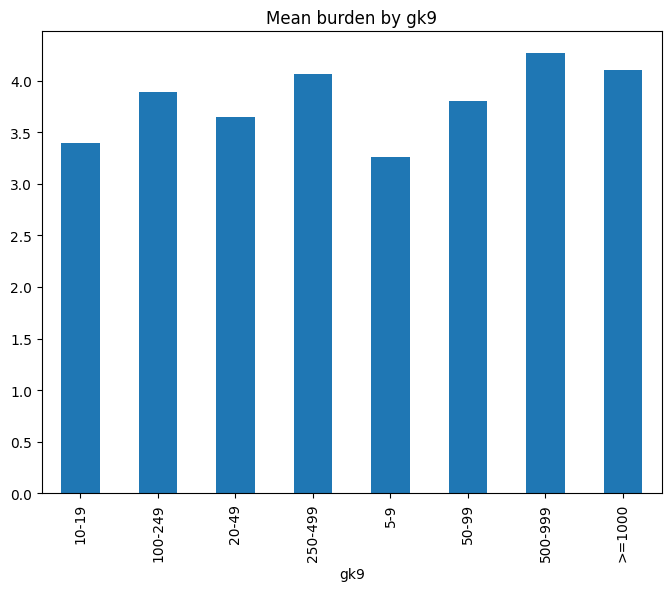

In [22]:
segmenter = 'gk9'
col_of_interest = 'burden'

print(df_clean[segmenter].value_counts())

grouped = df_clean.groupby(segmenter)
grouped[col_of_interest].mean().plot(kind='bar', figsize=(8, 6))
plt.title(f'Mean {col_of_interest} by {segmenter}')
df_clean.pivot_table(index=segmenter, values=col_of_interest, aggfunc='mean')

**See Correlations**

Useful to identify most predictive features or independent variables before creating any regression model. This is the Pearson correlation coefficient, which makes it only useful for linear association.

In [ ]:
# Seaborn scatterplots can be useful to make scatter plots
columns = ['a_positiv', 'a_rsicher', 'a_gefahr']

sns.pairplot(df_clean[columns]) # see all possible scatter plots

df[columns].corr() # see all correlation coefficients for cols that you want

print(df[columns].head()) 
plt.figure(figsize=(11,11))

columns = ['erf_speich', 'si_speich', 'erf_intern', 'si_intern', 'erf_extunt', 'si_extunt', 'erf_forsch', 'si_forsch', 
                  'a_rsicher', 'pdwichtig', 'a_nachteil', 'a_gefahr', 'a_kompliz', 'a_vorteil', 'a_vertrau', 'a_inno', 
                  'a_kost', 'a_berat', 'a_proz', 'a_stand', 'a_ki', 'a_forsch', 'aufwand', 'datengm', 'umheute']
plt.title("Correlation Matrix Dataset")
sns.heatmap(df[columns].corr(), color="k", annot=True, cmap="YlGnBu") # correlation matrix

**Create Logistic Regression Models**

This is the first logistic regression model that I made. The response variable is erf_extunt.

In [ ]:
# X: dataframe of 0/1 features, y: 0/1 target
X = df_clean[['si_extunt', 'pdwichtig23', 'pdwichtig45', 'kund_dat23', 'kund_dat45', 'datengm23', 'datengm45', 'a_positiv23', 'a_positiv45', 'a_rsicher23', 'a_rsicher45', 'a_gefahr23', 'a_gefahr45']].astype(int) # df_binary_features
y = df_clean['erf_extunt'].astype(int) # df_binary_target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# statsmodels on training data only
X_train_sm = sm.add_constant(X_train) # convert True/False → 1/0 because that is what the statsmodel ML trainer predicts
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

# evaluate on test data
X_test_sm = sm.add_constant(X_test)
y_pred_prob = result.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

# confusion matrix, accuracy, and full report
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

**Principal Component Analysis** 

for before trying the sklearn logistic regression model

In [ ]:
target = 'erf_extunt'
X = df_clean.drop(target, axis=1)
y = df_clean[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = PCA(n_components=4)
model.fit(X_iris)          
X_2D = model.transform(X_iris)

In [ ]:
print(X.dtypes)
print(weights.dtype)

**Linear Probability Model and Logistic Regression Model**

In [18]:
# Create copy of current dataframe for safety
df_reg = df_clean.copy()

# Define target or output or dependent variable
target = 'a_ki'

# Define Regressors and Controls
key_regressors = ['unsicher_high', 'burden_high', 'opportunity_high']
control_vars = ['pdwichtig', 'datengm', 'ds_unter_aktuell', 'ds_forsch_aktuell', 'kund_dat'] + list(size_dummies.columns) + list(sector_dummies.columns)
cols = [target] + key_regressors + control_vars + ['aweight']

for col in key_regressors + [target, 'ds_unter_aktuell', 'ds_forsch_aktuell'] + list(size_dummies.columns) + list(sector_dummies.columns):
    df_reg[col] = df_reg[col].astype(int)  # or .astype(float)

# Create X and y
y = df_reg[target]
X = df_reg[key_regressors + control_vars]
X = sm.add_constant(X)
weights = df_reg['aweight']

In [19]:
# Main model: weighted linear probability model (LPM) with robust SEs
lpm_model = sm.WLS(y, X, weights=weights)
lpm_results = lpm_model.fit(cov_type='HC1')  # heteroskedasticity-robust SEs
print(lpm_results.summary())

                            WLS Regression Results                            
Dep. Variable:                   a_ki   R-squared:                       0.205
Model:                            WLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     4.218
Date:                Sat, 21 Feb 2026   Prob (F-statistic):           8.07e-10
Time:                        17:34:29   Log-Likelihood:                -1183.5
No. Observations:                 637   AIC:                             2413.
Df Residuals:                     614   BIC:                             2516.
Df Model:                          22                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [11]:
# Check model: weighted logit (GLM with binomial family)
# Using GLM because it supports frequency / analytic weights more naturally
logit_model = sm.GLM(
    y,
    X,
    family=sm.families.Binomial(),
    freq_weights=weights
)
logit_results = logit_model.fit()
print(logit_results.summary())

# 8. Optional: compute marginal effects for the logit
marg_eff = logit_results.get_margeff(at='mean', method='dydx')
print(marg_eff.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             erf_forsch   No. Observations:                  637
Model:                            GLM   Df Residuals:                 80029.80
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18054.
Date:                Sat, 21 Feb 2026   Deviance:                       36108.
Time:                        17:31:26   Pearson chi2:                 8.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/genmod/generalized_linear_model.py:2381: UserWarning: weights are not taken into account by margeff
  warnings.warn("weights are not taken into account by margeff")
